In [32]:
from google.colab.patches import cv2_imshow

Original image :



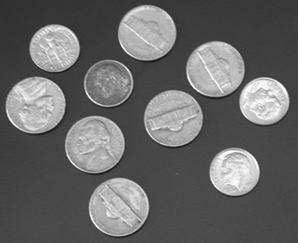


Edged image: 



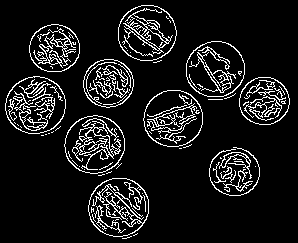

-1

In [33]:
import cv2

image = cv2.imread("coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(blurred, 10, 100)

print('Original image :\n')
cv2_imshow(image)
print('\nEdged image: \n')
cv2_imshow(edged)
cv2.waitKey(0)

31 objects were found in this image.
Edged image :



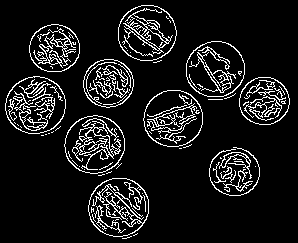


contours: 



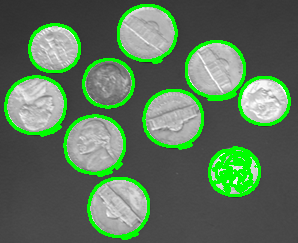

-1

In [34]:
# find the contours in the edged image
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

print('Edged image :\n')
cv2_imshow(edged)
print('\ncontours: \n')
cv2_imshow(image_copy)
cv2.waitKey(0)

10 objects were found in this image.
Dilated image :



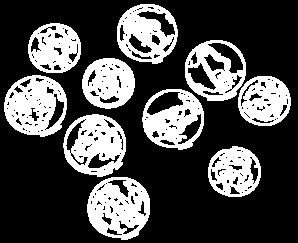


contours :



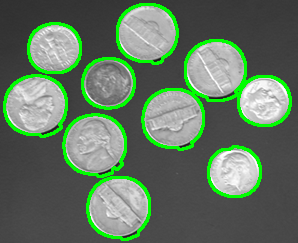

-1

In [35]:
image = cv2.imread("coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(blurred, 10, 100)

# define a (3, 3) structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# apply the dilation operation to the edged image
dilate = cv2.dilate(edged, kernel, iterations=1)

# find the contours in the dilated image
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

print('Dilated image :\n')
cv2_imshow(dilate)
print('\ncontours :\n')
cv2_imshow(image_copy)
cv2.waitKey(0)

Q2 **Bounding box of the shape**

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

image = cv2.imread('leaf.jpg')
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    ROI_number += 1

print('thresh')
cv2_imshow(thresh)
print('copy')
cv2_imshow(copy)
cv2.waitKey()

Q3 **Radon transform**

In [ ]:
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, iradon
from scipy.ndimage import zoom

image = imread("img.png", as_gray=True)
image = zoom(image, 0.4)

plt.figure(figsize=(8, 8.5))

plt.subplot(221)
plt.title("Original");
plt.imshow(image, cmap=plt.cm.Greys_r)

plt.subplot(222)
projections = radon(image, theta=[0, 45, 90])
plt.plot(projections);
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis");
plt.ylabel("Intensity");

projections = radon(image)
plt.subplot(223)
plt.title("Radon transform\n(Sinogram)");
plt.xlabel("Projection axis");
plt.ylabel("Intensity");
plt.imshow(projections)

reconstruction = iradon(projections)
plt.subplot(224)
plt.title("Reconstruction\nfrom sinogram")
plt.imshow(reconstruction, cmap=plt.cm.Greys_r)

plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()